In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [2]:
import pandas as pd
from pandas import DataFrame

In [3]:
import sys
sys.path.append('/Users/perdue/Documents/MINERvA/AI/ANNMINERvA')
from evtid_utils import decode_eventid

In [4]:
DIR_PATH = '/Users/perdue/Documents/MINERvA/AI/hdf5/201801/'
f = h5py.File(DIR_PATH + 'hadmultkineimgs_127x94_me1Amc.hdf5', 'r')
#f = h5py.File(DIR_PATH + 'mnvimgs_127x94_me1Amc_tiny.hdf5', 'r')

for group in f:
    for dset in f[group]:
        print '{:>10}/{:<16} - {:>8} {}'.format(group, dset, np.dtype(f[group][dset]), np.shape(f[group][dset]))

event_data/eventids         -   uint64 (1765828, 1)
event_data/eventids_a       -   uint32 (1765828, 1)
event_data/eventids_b       -   uint32 (1765828, 1)
  gen_data/Q2               -  float32 (1765828, 1)
  gen_data/W                -  float32 (1765828, 1)
  gen_data/current          -   uint32 (1765828, 1)
  gen_data/int_type         -   uint32 (1765828, 1)
  gen_data/targetZ          -   uint32 (1765828, 1)
  gen_data/x                -  float32 (1765828, 1)
  gen_data/y                -  float32 (1765828, 1)
hadro_data/esum_chgdkaons   -  float32 (1765828, 1)
hadro_data/esum_chgdpions   -  float32 (1765828, 1)
hadro_data/esum_hadmultmeas -  float32 (1765828, 1)
hadro_data/esum_neutpions   -  float32 (1765828, 1)
hadro_data/esum_neutrons    -  float32 (1765828, 1)
hadro_data/esum_others      -  float32 (1765828, 1)
hadro_data/esum_protons     -  float32 (1765828, 1)
hadro_data/n_chgdkaons      -   uint32 (1765828, 1)
hadro_data/n_chgdpions      -   uint32 (1765828, 1)
hadro_data/n

In [5]:
data = {'n-protons': f['hadro_data']['n_protons'][:,0],
        'n-pions': f['hadro_data']['n_chgdpions'][:,0],
        'n-kaons': f['hadro_data']['n_chgdkaons'][:,0],
        'n-hadmultmeas': f['hadro_data']['n_hadmultmeas'][:,0]}
df = DataFrame(data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765828 entries, 0 to 1765827
Data columns (total 4 columns):
n-hadmultmeas    uint32
n-kaons          uint32
n-pions          uint32
n-protons        uint32
dtypes: uint32(4)
memory usage: 26.9 MB


In [7]:
min_h, max_h = np.min(df['n-hadmultmeas']), np.max(df['n-hadmultmeas'])
print min_h, max_h

0 20


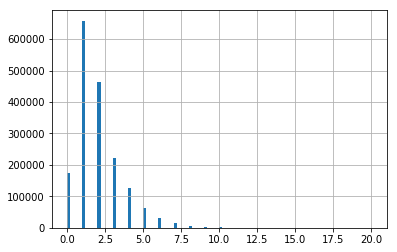

In [8]:
df['n-hadmultmeas'].hist(bins=100)

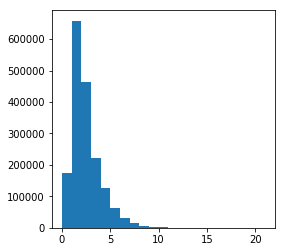

In [9]:
fig = plt.figure(figsize=(4, 4))
n, bins, patches = plt.hist(f['hadro_data']['n_hadmultmeas'][:,0], bins=np.arange(max_h + 2))
#fig.savefig('n-hadmultmeas_20160503.pdf')

In [10]:
print(n)
print(len(n))

[  1.74280000e+05   6.58660000e+05   4.64609000e+05   2.22214000e+05
   1.26226000e+05   6.21480000e+04   3.17160000e+04   1.40510000e+04
   6.63700000e+03   2.88000000e+03   1.30900000e+03   5.63000000e+02
   2.61000000e+02   1.59000000e+02   6.50000000e+01   3.10000000e+01
   1.00000000e+01   6.00000000e+00   2.00000000e+00   0.00000000e+00
   1.00000000e+00]
21


In [11]:
print(bins)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [18]:
over_flow_cand = 4
ntot = np.sum(n)

print('-----------------------------------------')
print('n total = {}'.format(ntot))

print('-----------------------------------------')
for i in range(max_h + 1):
    print('{} hadrons sum: {}'.format(i, n[i]))
    
print('{}+ hadrons sum: {}'.format(over_flow_cand, sum(n[over_flow_cand:])))
    
print('-----------------------------------------')
for i in range(max_h + 1):
    print('{} hadrons fraction: {}'.format(i, n[i] / ntot))
    
print('-----------------------------------------')
for i in range(over_flow_cand):
    print('{} hadrons fraction: {}'.format(i, n[i] / ntot))
print('{}+ hadrons fraction: {}'.format(over_flow_cand, sum(n[over_flow_cand:]) / ntot))

-----------------------------------------
n total = 1765828.0
-----------------------------------------
0 hadrons sum: 174280.0
1 hadrons sum: 658660.0
2 hadrons sum: 464609.0
3 hadrons sum: 222214.0
4 hadrons sum: 126226.0
5 hadrons sum: 62148.0
6 hadrons sum: 31716.0
7 hadrons sum: 14051.0
8 hadrons sum: 6637.0
9 hadrons sum: 2880.0
10 hadrons sum: 1309.0
11 hadrons sum: 563.0
12 hadrons sum: 261.0
13 hadrons sum: 159.0
14 hadrons sum: 65.0
15 hadrons sum: 31.0
16 hadrons sum: 10.0
17 hadrons sum: 6.0
18 hadrons sum: 2.0
19 hadrons sum: 0.0
20 hadrons sum: 1.0
4+ hadrons sum: 246065.0
-----------------------------------------
0 hadrons fraction: 0.0986959092279
1 hadrons fraction: 0.373003486183
2 hadrons fraction: 0.263111129736
3 hadrons fraction: 0.125841248412
4 hadrons fraction: 0.0714826132557
5 hadrons fraction: 0.0351948207866
6 hadrons fraction: 0.017960979212
7 hadrons fraction: 0.00795717363186
8 hadrons fraction: 0.00375857671302
9 hadrons fraction: 0.00163096292504
10 ha

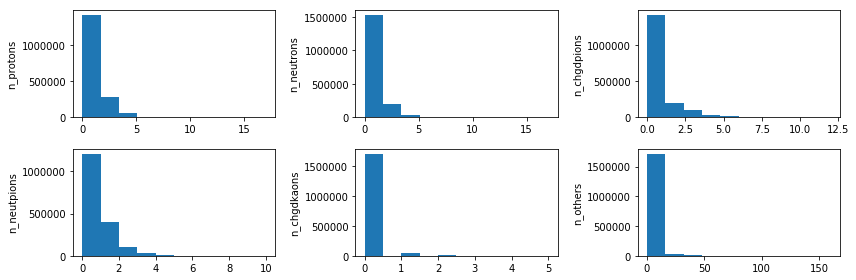

In [13]:
fig = plt.figure(figsize=(12,4))
gs = plt.GridSpec(2, 3)

ax = plt.subplot(gs[0])
plt.hist(f['hadro_data']['n_protons'][:, 0])
plt.ylabel('n_protons')

ax = plt.subplot(gs[1])
plt.hist(f['hadro_data']['n_neutrons'][:, 0])
plt.ylabel('n_neutrons')

ax = plt.subplot(gs[2])
plt.hist(f['hadro_data']['n_chgdpions'][:, 0])
plt.ylabel('n_chgdpions')

ax = plt.subplot(gs[3])
plt.hist(f['hadro_data']['n_neutpions'][:, 0])
plt.ylabel('n_neutpions')

ax = plt.subplot(gs[4])
plt.hist(f['hadro_data']['n_chgdkaons'][:, 0])
plt.ylabel('n_chgdkaons')

ax = plt.subplot(gs[5])
plt.hist(f['hadro_data']['n_others'][:, 0])
plt.ylabel('n_others')

plt.tight_layout()

#plt.yscale('log')
#fig.savefig('n20160503.pdf')

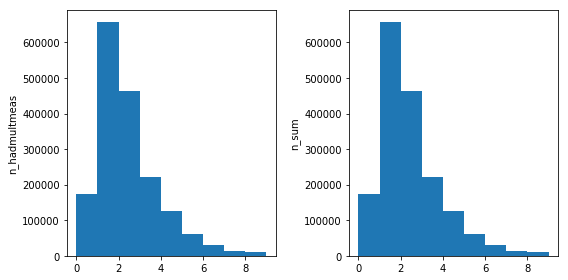

In [14]:
#(df['n-protons'] + df['n-pions'] + df['n-kaons']).hist()
fig = plt.figure(figsize=(8, 4))
gs = plt.GridSpec(1, 2)

ax = plt.subplot(gs[0])
plt.hist(f['hadro_data']['n_hadmultmeas'][:, 0], np.arange(10))
plt.ylabel('n_hadmultmeas')

ax = plt.subplot(gs[1])
plt.hist(f['hadro_data']['n_protons'][:, 0] + f['hadro_data']['n_chgdpions'][:, 0] + f['hadro_data']['n_chgdkaons'][:, 0], np.arange(10))
plt.ylabel('n_sum')

plt.tight_layout()

In [15]:
n_evt = 500
for i in range(n_evt):
    n_p, n_cp, n_ck = f['hadro_data']['n_protons'][i, 0], \
        f['hadro_data']['n_chgdpions'][i, 0], \
        f['hadro_data']['n_chgdkaons'][i, 0]
    n_hm = f['hadro_data']['n_hadmultmeas'][i, 0]
    if n_p + n_cp + n_ck != n_hm:
        print(decode_eventid(f['event_data']['eventids'][i, 0]), n_p + n_cp + n_ck, n_hm)

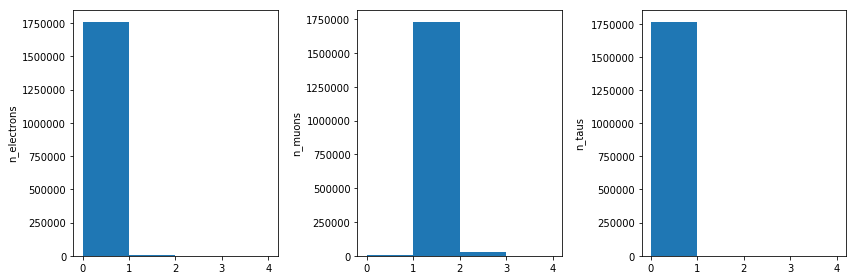

In [16]:
fig = plt.figure(figsize=(12,4))
gs = plt.GridSpec(1, 3)

ax = plt.subplot(gs[0])
plt.hist(f['lepto_data']['n_electrons'][:, 0], np.arange(5))
plt.ylabel('n_electrons')

ax = plt.subplot(gs[1])
plt.hist(f['lepto_data']['n_muons'][:, 0], np.arange(5))
plt.ylabel('n_muons')

ax = plt.subplot(gs[2])
plt.hist(f['lepto_data']['n_taus'][:, 0], np.arange(5))
plt.ylabel('n_taus')

plt.tight_layout()

In [17]:
f.close()